<a href="https://colab.research.google.com/github/shinjiyeong/homework_textmining/blob/main/wk5_%EC%8B%A0%EC%A7%80%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import ujson
# import json도 사용가능
from kiwipiepy import Kiwi

CHK_POSES = {"NNG", "NNP", "VV", "VA" "XR"} # 명사와 어근
INPUT_FILE_NAME = "mayor_news_morph.jsonl"

article_nums = []
dates = []
publishers = []
titles = []
urls = []
documents = []

branch_idxes = dict()

kiwi = Kiwi()

with open(INPUT_FILE_NAME, 'r', encoding="UTF-8") as input_file:
    for idx, line in enumerate(input_file):
        data = ujson.loads(line)
        article_nums.append(data["article_num"])
        dates.append(data["date"])
        publishers.append(data["publisher"])
        titles.append(data["title"])
        urls.append(data["url"])
        publishers_idxes.update({data["publisher"]: idx})

        word_mas = []

        body_sent = [sent.text for sent in kiwi.split_into_sents(data["body"])]
        for sent in body_sent:
            word_mas.append([token.form for token in kiwi.tokenize(sent) if token.tag in CHK_POSES])

        desc_mas = data["title_ma"] #description_ma: 형태소분석 해놓은 결과. 단위는 문서. 하나씩 꺼내면 문장
        # 문장별로 가져온다.
        for desc_ma in desc_mas:
            word_ma = [lex + "다" if pos in {"VA", "VV"} else lex for lex, pos in desc_ma if pos in CHK_POSES]
            word_mas.append(word_ma)

        documents.append(word_mas)

        articles = {
            "article_num": article_nums,
            "date": dates,
            "publisher": publishers,
            "title": titles,
            "url": urls,
            "wordset": documents
        }

In [ ]:
articles["wordset"][publishers_idxes["내일신문"]]

[['요즘', '아파트', '생활', '갈등', '흡연'],
 ['아파트', '계단', '베란다', '화장실', '담배', '냄새', '올라오', '민원', '끊이'],
 ['금연', '아파트', '지정', '아파트', '최근', '늘'],
 ['금연', '아파트', '지정', '되', '흡연', '갈등', '해결'],
 ['금연', '아파트', '대하', '제반', '사항', '알아보'],
 ['아파트', '세대주', '과반수', '동의', '필요', '서울시', '전국', '최초', '금연', '아파트', '사업', '시작'],
 ['아파트',
  '금연',
  '구역',
  '지정',
  '흡연',
  '구역',
  '운영',
  '아파트',
  '대하',
  '시',
  '차원',
  '금연',
  '아파트',
  '인증',
  '하'],
 ['금연', '강제', '담배', '피우', '주민', '과태료', '물리', '하'],
 ['실효', '지적', '이어지', '서울시', '금연', '아파트', '이후', '사라지'],
 ['이번', '정부', '금연', '아파트', '들', '나오'],
 ['개정', '국민', '건강', '증진', '법'],
 ['법',
  '따르',
  '공동',
  '주택',
  '거주',
  '세대주',
  '이상',
  '동의',
  '서명',
  '관할',
  '보건소',
  '신청',
  '금연',
  '아파트',
  '지정'],
 ['이전',
  '서울시',
  '금연',
  '아파트',
  '점',
  '금연',
  '아파트',
  '지정',
  '위반자',
  '과태료',
  '처분',
  '하',
  '금연',
  '아파트',
  '관리',
  '사무소',
  '게시판',
  '알림',
  '판',
  '방송',
  '통하',
  '주민',
  '단지',
  '흡연',
  '금지',
  '내용',
  '알리'],
 ['금연', '구역', '표지판', '설치', '관리', '하'],
 ['복도',
  '계단',


In [ ]:
import math

bodys = {}

for publishers in PUBLISHERS:
    bodys[publishers] = articles["wordset"][publishers_idxes[publishers]]

    unigram_count = Counter()
    bigram_count = Counter()

    ppmis = Counter()

    for body in bodys[publishers]:
        unigram_count.update(body)

        bigram = list(zip(*[body[i:] for i in range(2)]))
        bigram_count.update(bigram)

    N = sum(unigram_count.values())

    for (left_w, right_w), count in bigram_count.items():
        pmi = math.log2((N * count) / (unigram_count[left_w] * unigram_count[right_w]))
        ppmi = max(pmi, 0.0)
        ppmis[(left_w, right_w)] = ppmi

    print("========= {} =========".format(publishers))
    for (bigram, count) in ppmis.most_common(10):
        print("{}\t\t{}".format(" & ".join(bigram), count))
    print()
    print()

========= 매일경제 =========
무역 & 전시장		7.011227255423254
기관 & 전문		7.011227255423254
전문 & 병원		7.011227255423254
단체 & 참여		7.011227255423254
참여 & 혈압		7.011227255423254
혈압 & 류마티스		7.011227255423254
류마티스 & 당뇨		7.011227255423254
당뇨 & 무료		7.011227255423254
무료 & 검진		7.011227255423254
검진 & 영양		7.011227255423254


========= 내일신문 =========
올라오 & 민원		9.087462841250339
민원 & 끊이		9.087462841250339
최근 & 늘		9.087462841250339
시 & 차원		9.087462841250339
실효 & 지적		9.087462841250339
지적 & 이어지		9.087462841250339
이후 & 사라지		9.087462841250339
개정 & 국민		9.087462841250339
서명 & 관할		9.087462841250339
사무소 & 게시판		9.087462841250339


========= 서울신문 =========
형형색색 & 빛		7.857980995127572
빛 & 물들		7.857980995127572
연두색 & 주황색		7.857980995127572
주황색 & 분홍색		7.857980995127572
분홍색 & 파란색		7.857980995127572
파란색 & 색깔		7.857980995127572
색깔 & 운동복		7.857980995127572
행렬 & 이어지		7.857980995127572
청장 & 동참		7.857980995127572
육박 & 때		7.857980995127572


========= 문화일보 =========
조선 & 한양		8.519636252843213
한양 & 도읍		8.519636252843213
도읍 & 정하		8.519

In [ ]:
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
from pprint import pprint
from gensim.models.phrases import Phrases
from gensim.models.phrases import Phraser

for publishers in PUBLISHERS:
    gen_phrases = Phrases(bodys[publishers], min_count=5, threshold=0.4, scoring="npmi") # npmi 양수로 가면 association이 강함.
    gen_bigram = Phraser(gen_phrases) # Training된 것으로 적용

    print("================ {} ================".format(publishers))
    for bi_sent, sent in zip(gen_bigram[bodys[publishers]][:10], bodys[publishers][:10]):
        if len(sent) > 2:
            print("unigram: {}".format(sent))
            print("bigram: {}".format(bi_sent))
            print()
    print("=====================================")
    print()

================ 매일경제 ================
unigram: ['도시', '건강', '시민', '건강']
bigram: ['도시', '건강', '시민', '건강']

unigram: ['서울시', '서울', '건강', '도시', '만들', '프로젝트', '하이', '서울', '건강', '엑스포', '오', '서울', '무역', '전시장', '개최', '밝히']
bigram: ['서울시', '서울', '건강', '도시', '만들', '프로젝트', '하이', '서울', '건강', '엑스포', '오', '서울', '무역', '전시장', '개최', '밝히']

unigram: ['이번', '엑스포', '국내', '유수', '의료', '기관', '전문', '병원', '건강', '단체', '참여', '혈압', '류마티스', '당뇨', '무료', '검진', '영양', '상담', '체력', '측정', '서비스', '금연', '절', '주', '운동', '스트레스', '질병', '요인', '관하', '정보']
bigram: ['이번', '엑스포', '국내', '유수', '의료', '기관', '전문', '병원', '건강', '단체', '참여', '혈압', '류마티스', '당뇨', '무료', '검진', '영양', '상담', '체력', '측정', '서비스', '금연', '절', '주', '운동', '스트레스', '질병', '요인', '관하', '정보']

unigram: ['주', '미용', '레져', '의료', '건강', '삶', '필요', '웰빙', '제품', '전시', '서울', '시민', '건강', '걷기', '대회', '헌혈', '캠페인', '모유', '수유', '대회', '치아', '건강', '잔치', '다양', '이벤트', '마련']
bigram: ['주', '미용', '레져', '의료', '건강', '삶', '필요', '웰빙', '제품', '전시', '서울', '시민', '건강', '걷기', '대회', '헌혈', '캠페인', '모유', '수유

In [ ]:
print(bodys["헤럴드경제"][0])

['서울', '종로구', '구청장', '김영종', '주민', '행복', '우선', '주민', '직원', '협력', '행정', '펼치', '결과', '지난해', '중앙', '부처', '서울시', '외부', '기관', '평가', '공모', '역대', '최고', '성과', '분야', '수상', '사업비', '확보', '품격', '종로', '위상', '높이']


In [ ]:
from collections import Counter
from collections import defaultdict

from itertools import combinations

from operator import itemgetter

cooccurance_count = {}
cooccurance_list = {}

for publishers in PUBLISHERS:

    cooc_count = defaultdict(Counter)

    for body in bodys[publishers]:
        body = sorted(set(body))

        for word_l, word_r in combinations(body, 2):
            cooc_count[word_l][word_r] += 1

    cooccurance_count[publishers] = cooc_count

    cooc_list = []
    for word_l, word_r_count in cooccurance_count[publishers].items():
        for word_r, count in word_r_count.items():
            cooc_list.append((word_l, word_r, count))

    cooccurance_list[publishers] = sorted(cooc_list, key=itemgetter(2), reverse=True)

In [ ]:
for publishers in PUBLISHERS:
    print("================ {} ================".format(publishers))

    for (word_l, word_r, count) in cooccurance_list[publishers][:10]:
        print("{} \t+\t {} \t=\t {}".format(word_l, word_r, count))

    print("=====================================")
    print()

================ 매일경제 ================
건강 	+	 도시 	=	 5
건강 	+	 서울 	=	 5
도시 	+	 서울 	=	 4
건강 	+	 엑스포 	=	 3
건강 	+	 의료 	=	 3
건강 	+	 시민 	=	 2
건강 	+	 서울시 	=	 2
건강 	+	 프로젝트 	=	 2
건강 	+	 하이 	=	 2
건강 	+	 국내 	=	 2

================ 내일신문 ================
금연 	+	 아파트 	=	 24
아파트 	+	 흡연 	=	 9
아파트 	+	 지정 	=	 8
금연 	+	 지정 	=	 8
금연 	+	 흡연 	=	 6
금연 	+	 주민 	=	 6
아파트 	+	 주민 	=	 5
금연 	+	 하 	=	 5
금연 	+	 신청 	=	 5
신청 	+	 아파트 	=	 5

================ 서울신문 ================
걷기 	+	 구 	=	 4
구청장 	+	 노 	=	 4
걷기 	+	 주민 	=	 3
강서구 	+	 둘레길 	=	 2
강서구 	+	 서울 	=	 2
강서구 	+	 건강 	=	 2
강서구 	+	 도시 	=	 2
개화산 	+	 둘레길 	=	 2
둘레길 	+	 서울 	=	 2
걷기 	+	 도보 	=	 2

================ 문화일보 ================
도시 	+	 문화 	=	 7
문화 	+	 역사 	=	 6
도시 	+	 재생 	=	 6
문화 	+	 종로 	=	 5
도시 	+	 사업 	=	 5
문화 	+	 예술 	=	 4
문화 	+	 재생 	=	 4
문화 	+	 지역 	=	 4
도시 	+	 역사 	=	 4
사업 	+	 재생 	=	 4

================ 헤럴드경제 ================
분야 	+	 수상 	=	 9
사업 	+	 수상 	=	 7
수상 	+	 평가 	=	 6
수상 	+	 우수 	=	 6
결과 	+	 성과 	=	 5
기관 	+	 수상 	=	 5
성과 	+	 수상 	=	 5
도시 	+	 수상 	=	 5
선정 	+	 수상 	=	 5


C:\Users\happy\AppData\Local\Temp\ipykernel_7204\3942479182.py:9: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)


================== 매일경제 ==================


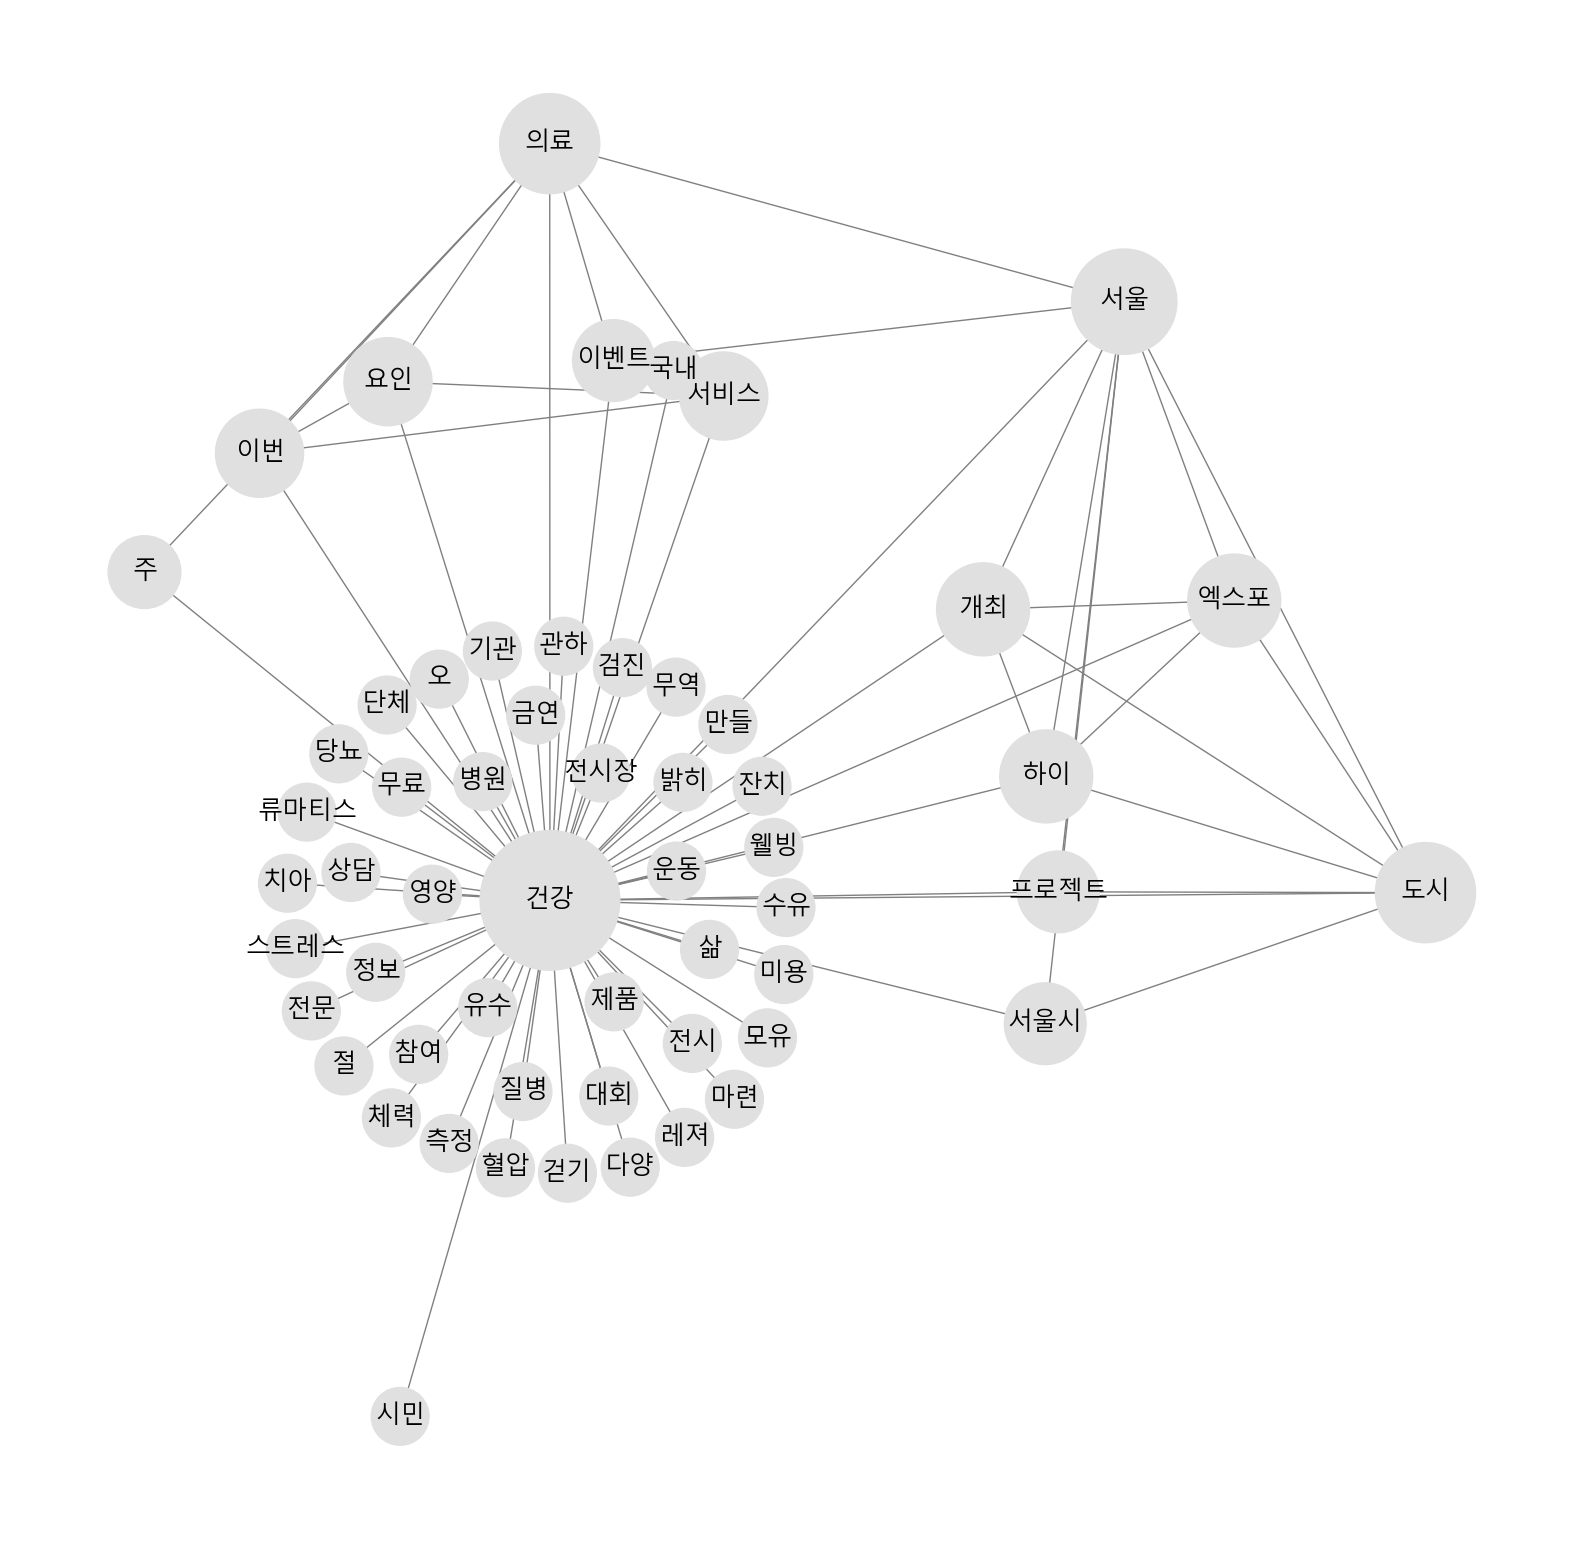

================== 내일신문 ==================


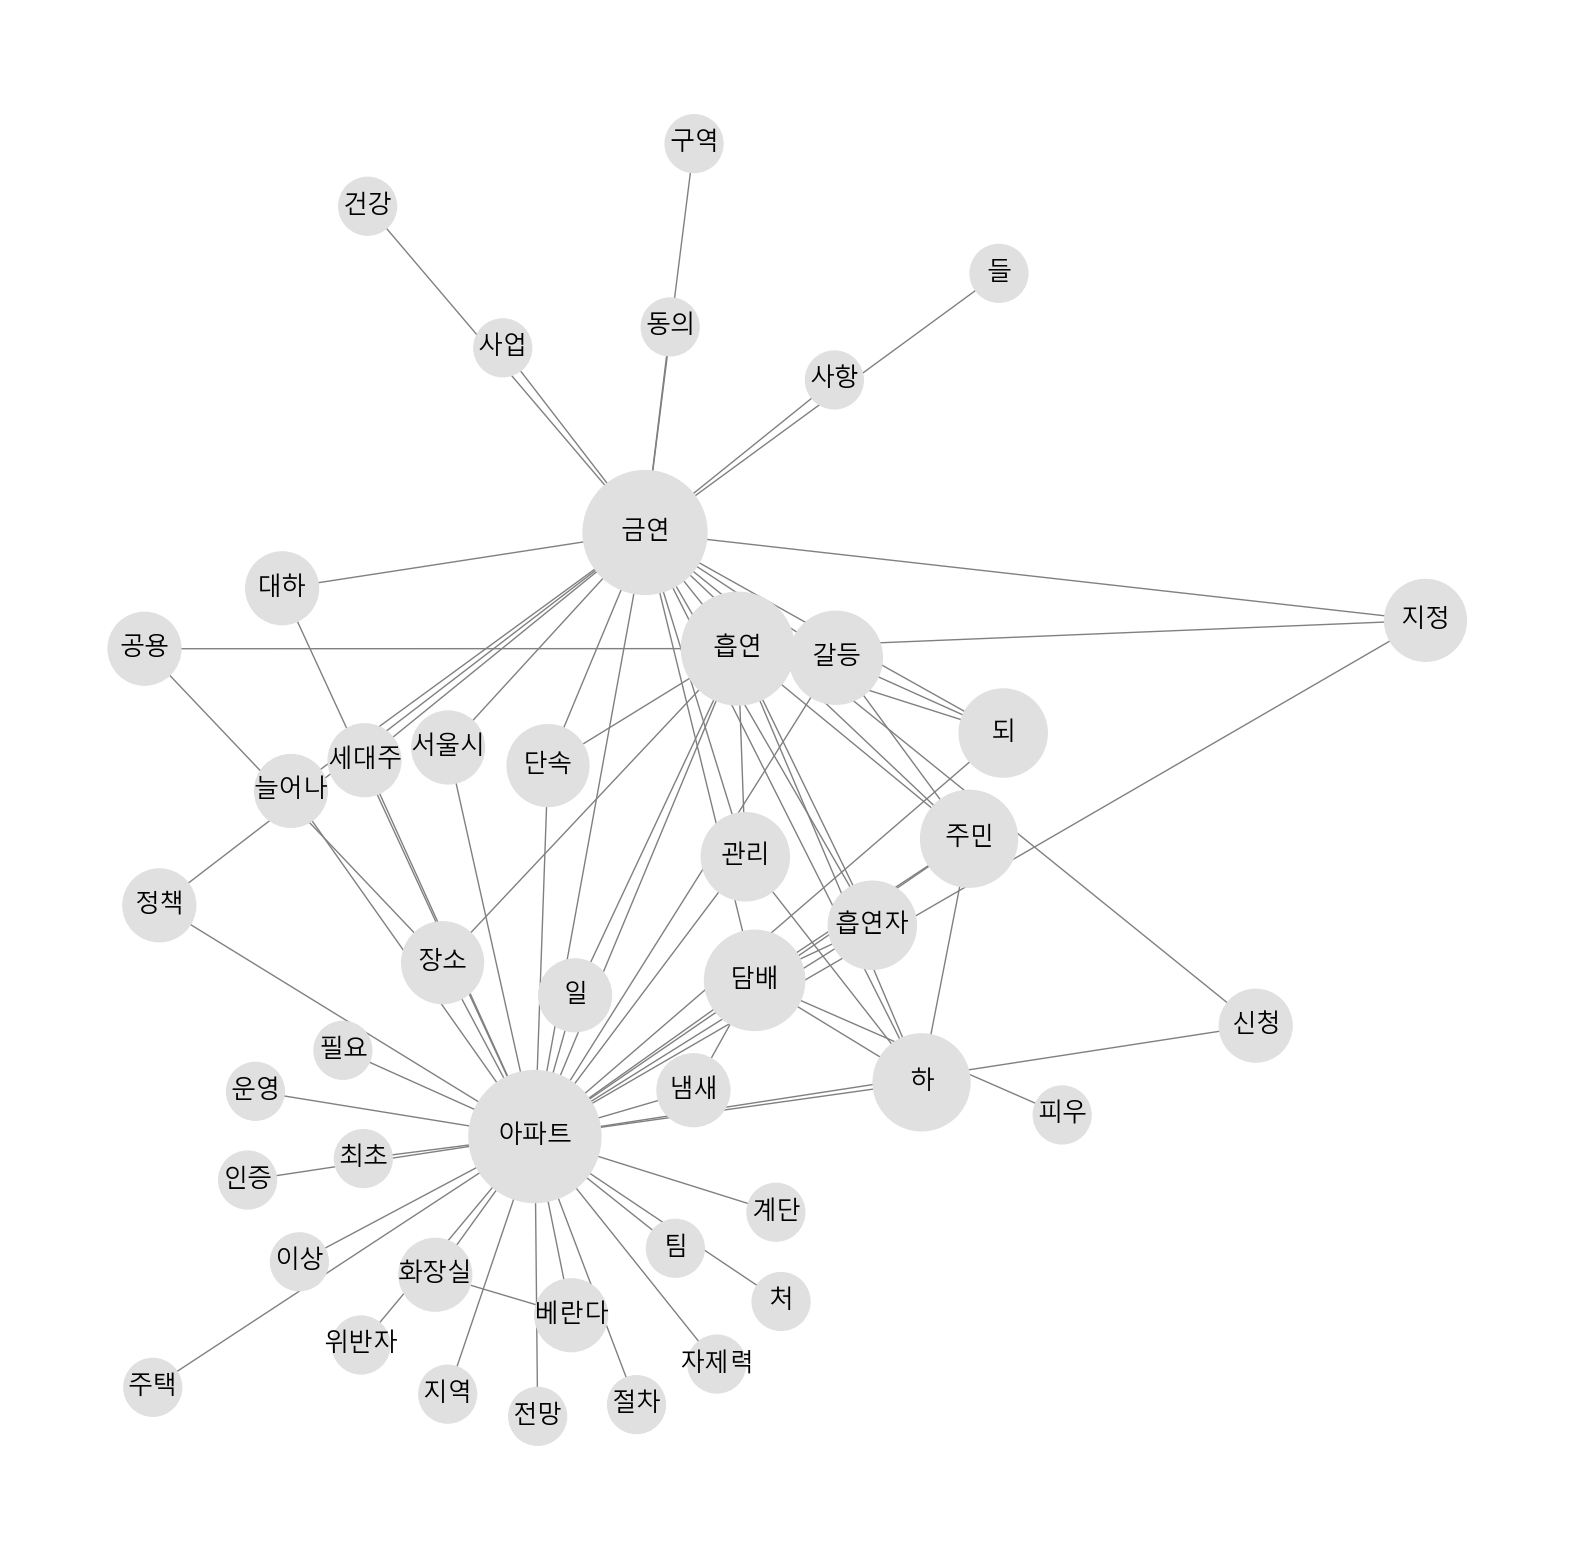

================== 서울신문 ==================


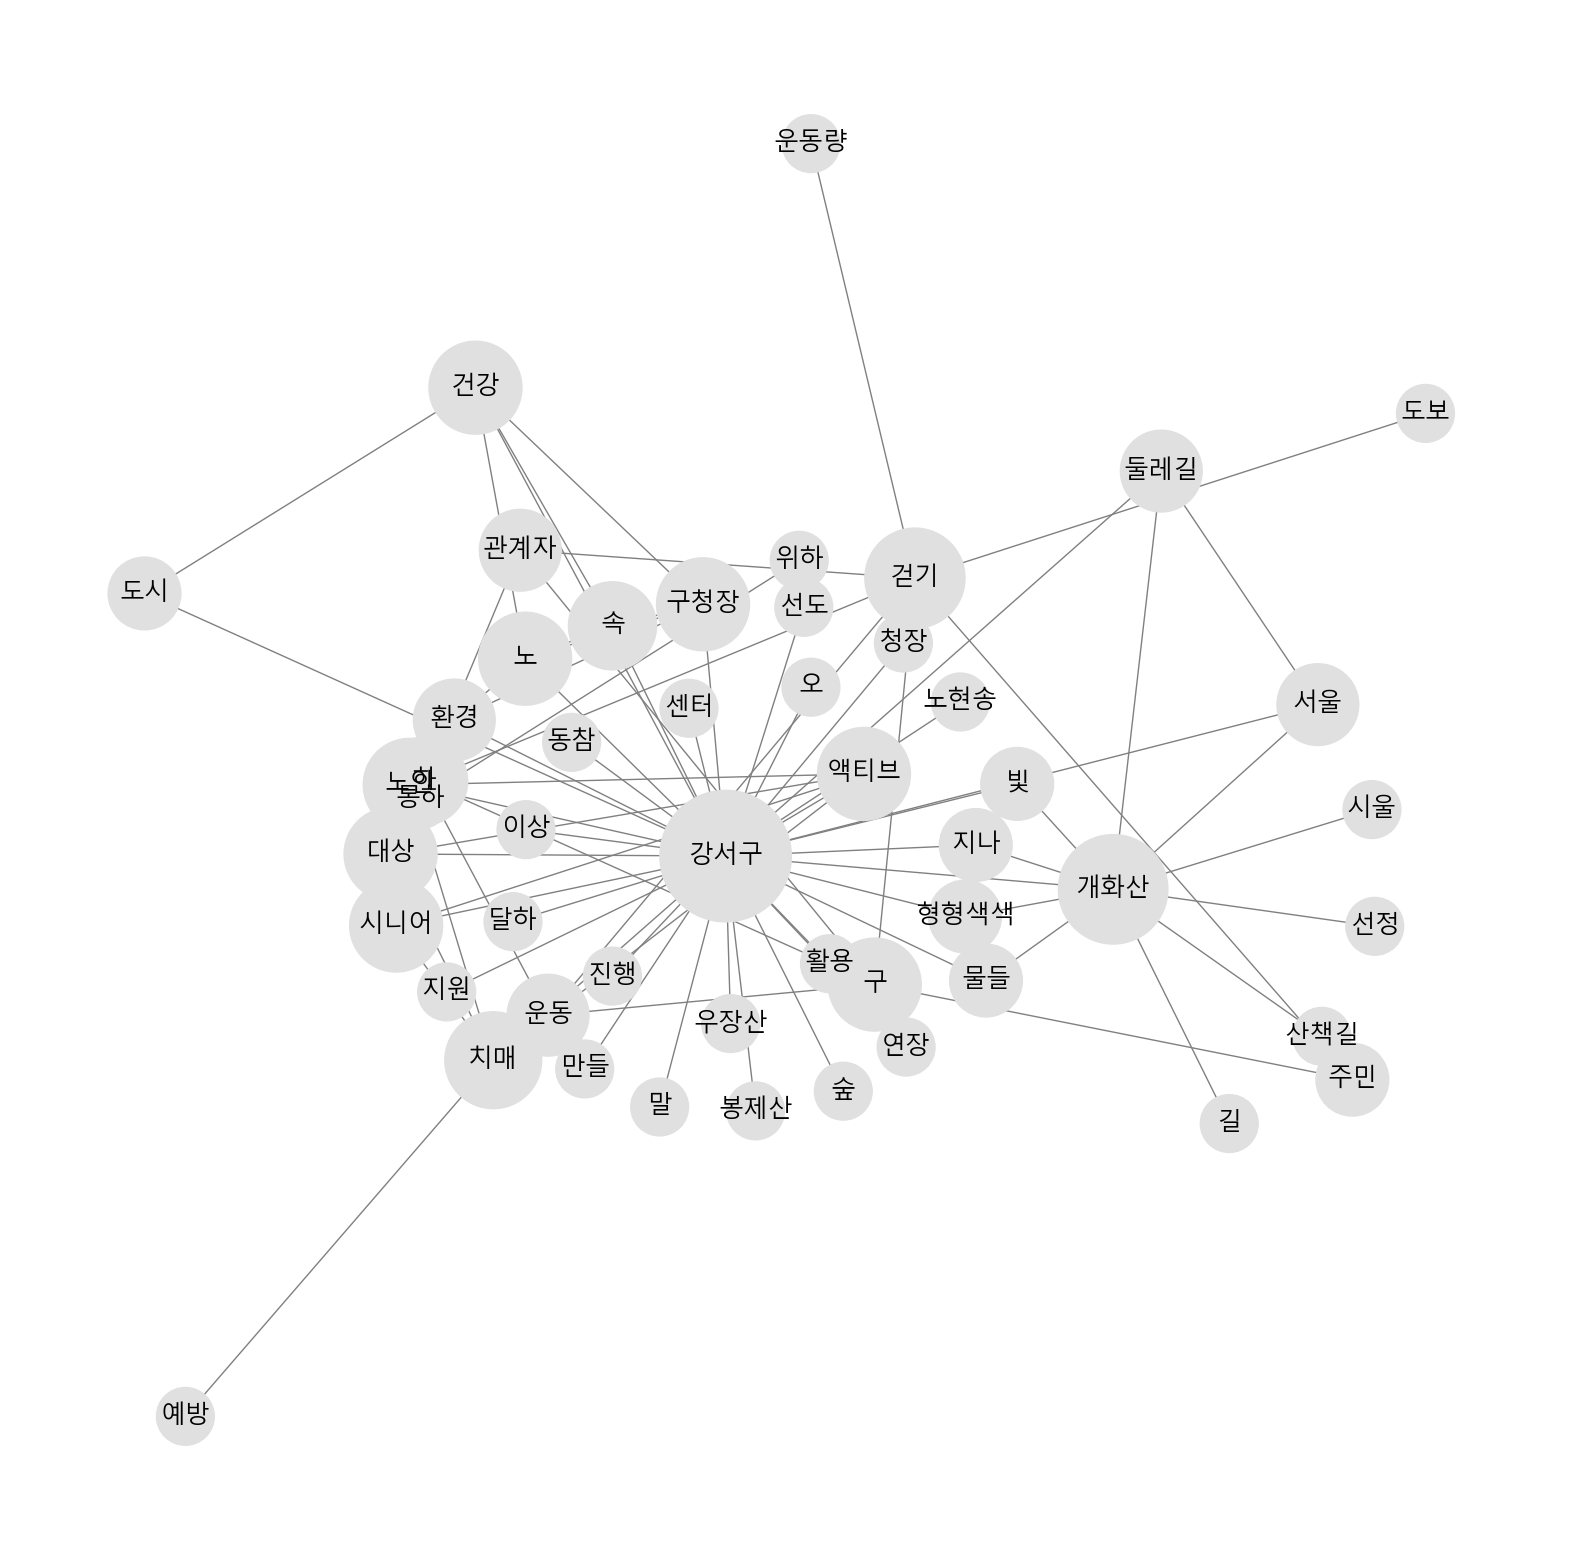

================== 문화일보 ==================


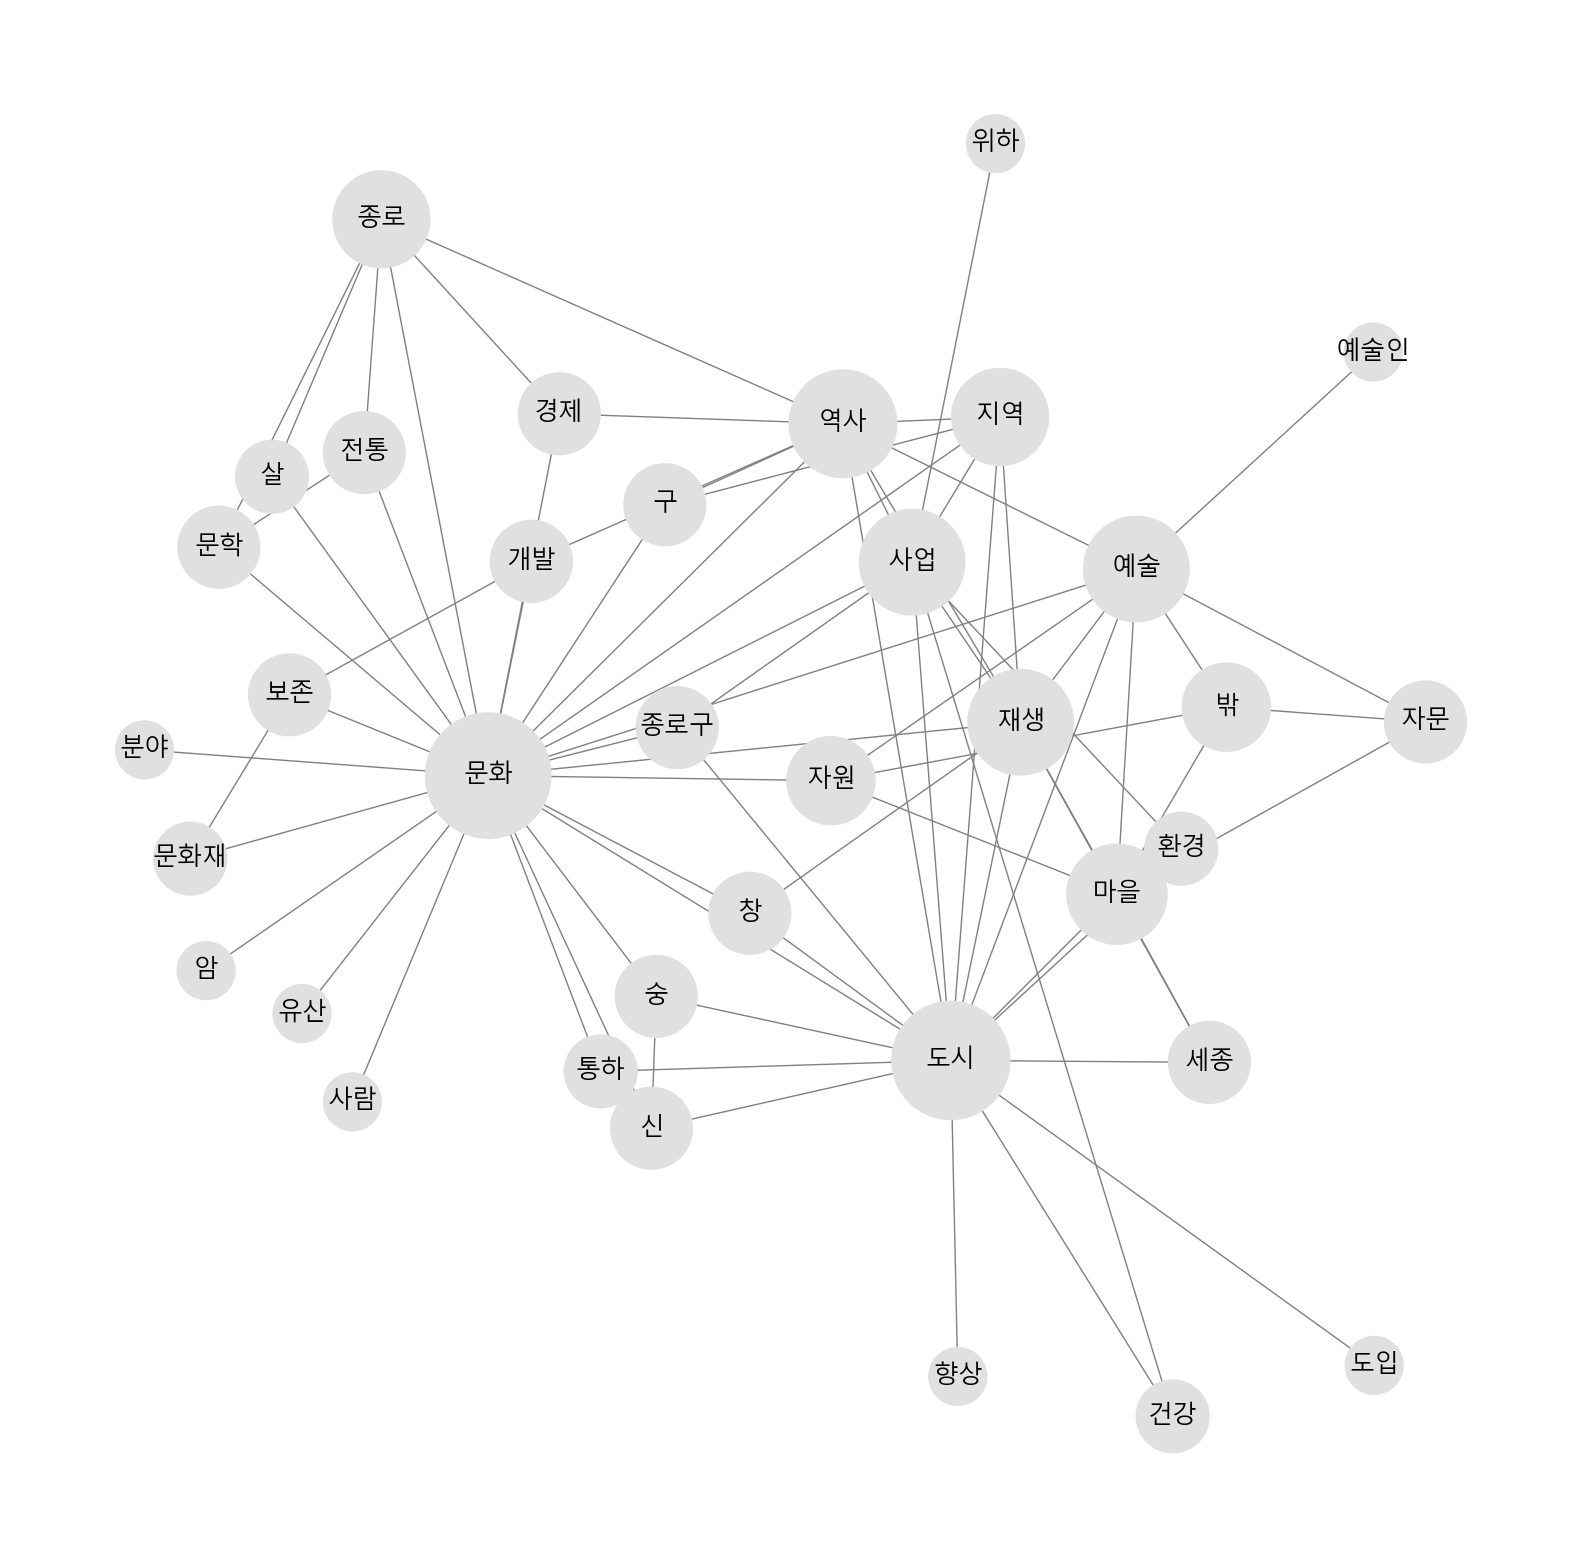

================== 헤럴드경제 ==================


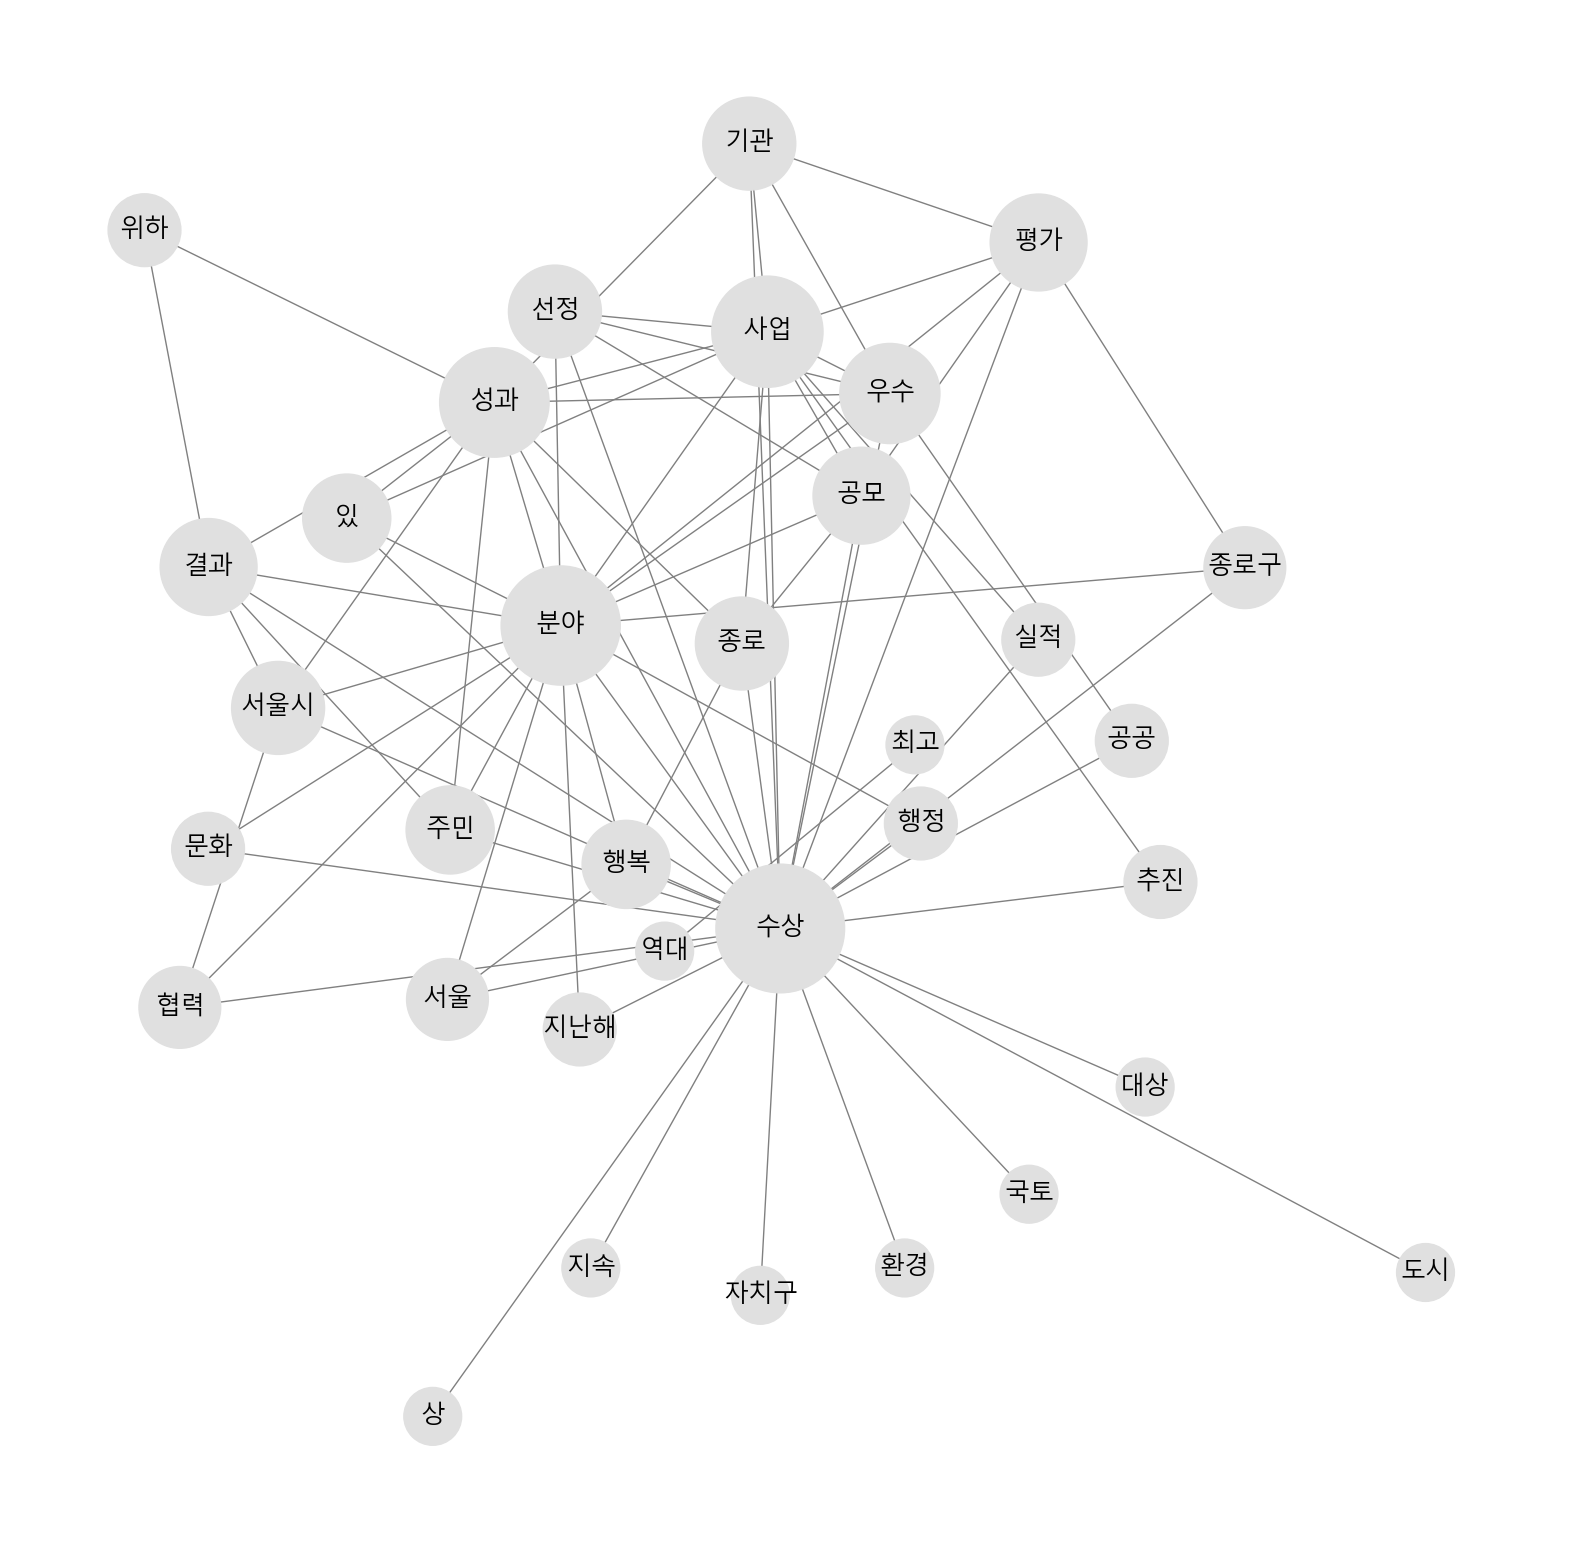

In [ ]:
import sys
import math
import networkx as nx
import matplotlib.pyplot as plt

# warnings 안보이게 해줌
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

NODE_NUM = 80

general_networks = {}
for publishers in PUBLISHERS:
    print("================== {} ==================".format(publishers))
    G = nx.Graph()

    for word_l, word_r, count in cooccurance_list[publishers][:NODE_NUM]:
        G.add_edge(word_l, word_r, weight=count)

    general_networks[publishers] = G

    sizes = [math.log(G.degree(n) + 1) * 2500 for n in G.nodes()]
    plt.figure(figsize = (20, 20))

    nx.draw_networkx(G,
                    pos = nx.kamada_kawai_layout(G, scale=1),
                    node_size = sizes,
                     node_color = '#e0e0e0',
                     edge_color = 'grey',
                     font_family = "malgun gothic", # "NanumGothic", "malgun gothic" 또는 "AppleGothic"
                     #label_pos = 0.5, # [0 - 1], Head to Tail
                     with_labels = True,
                     font_size = 18
                    )

    plt.axis("off")
    plt.show()

================== 매일경제 ==================


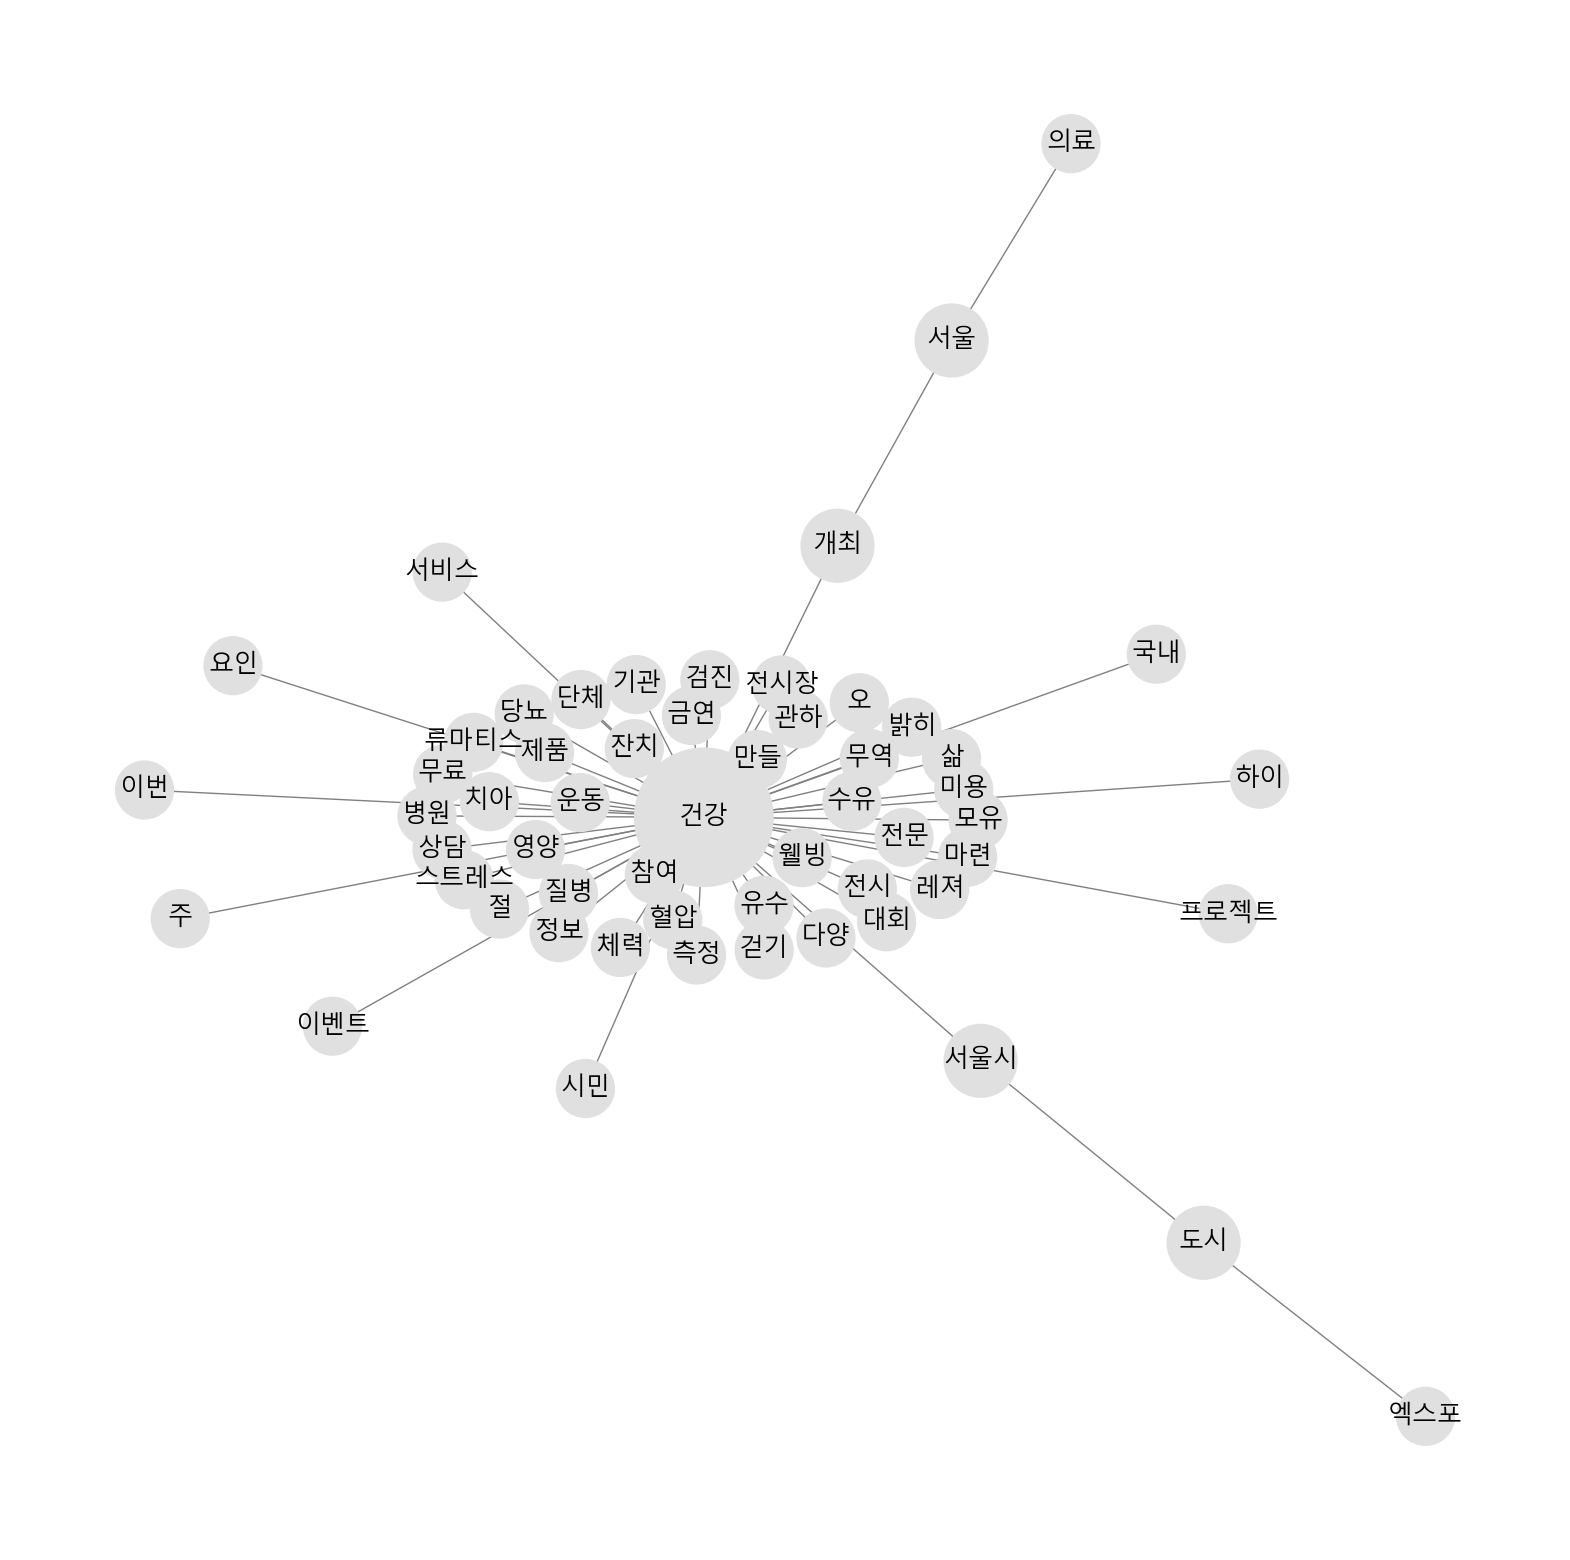

================== 내일신문 ==================


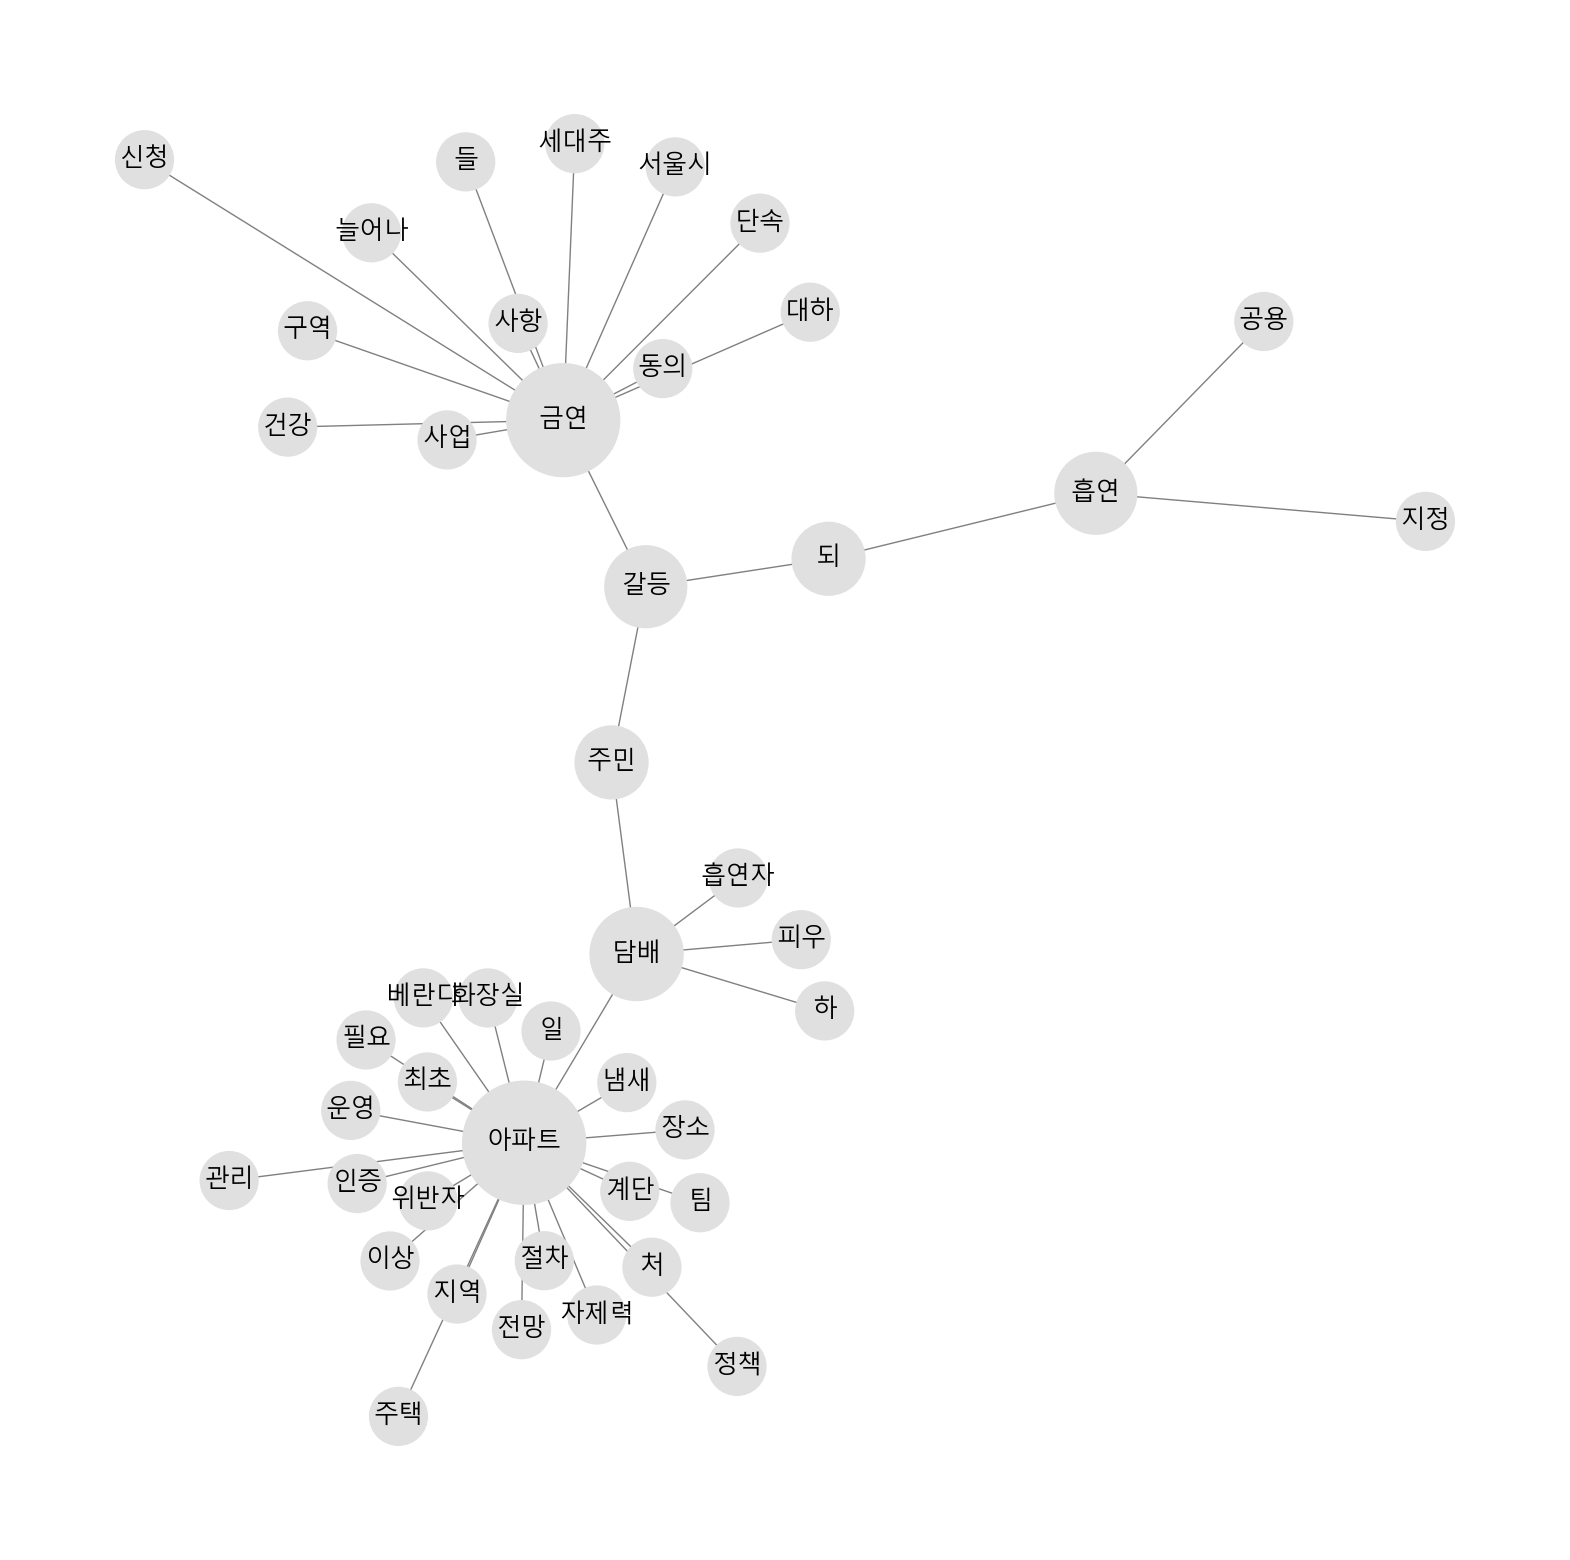

================== 서울신문 ==================


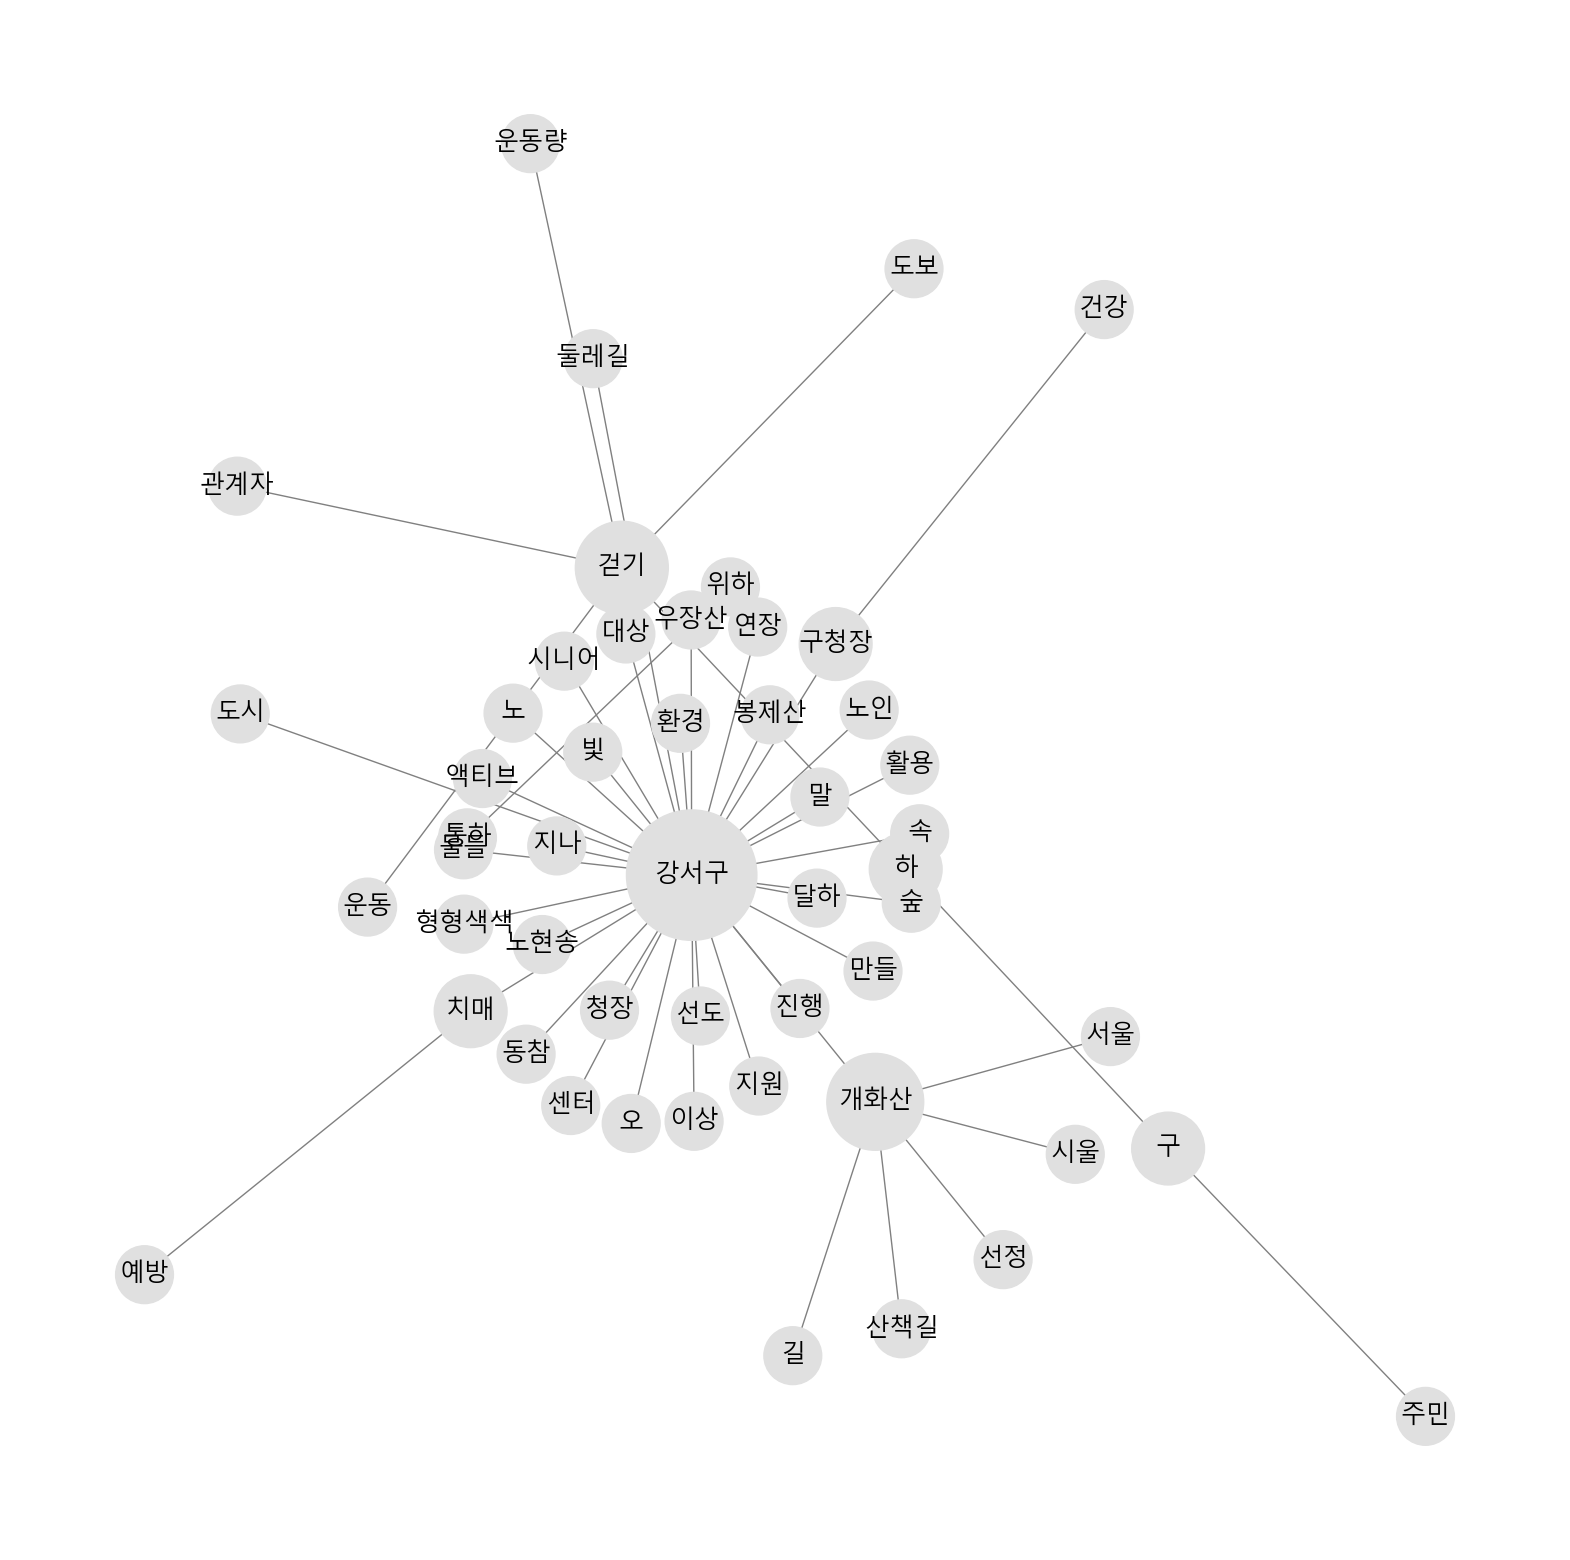

================== 문화일보 ==================


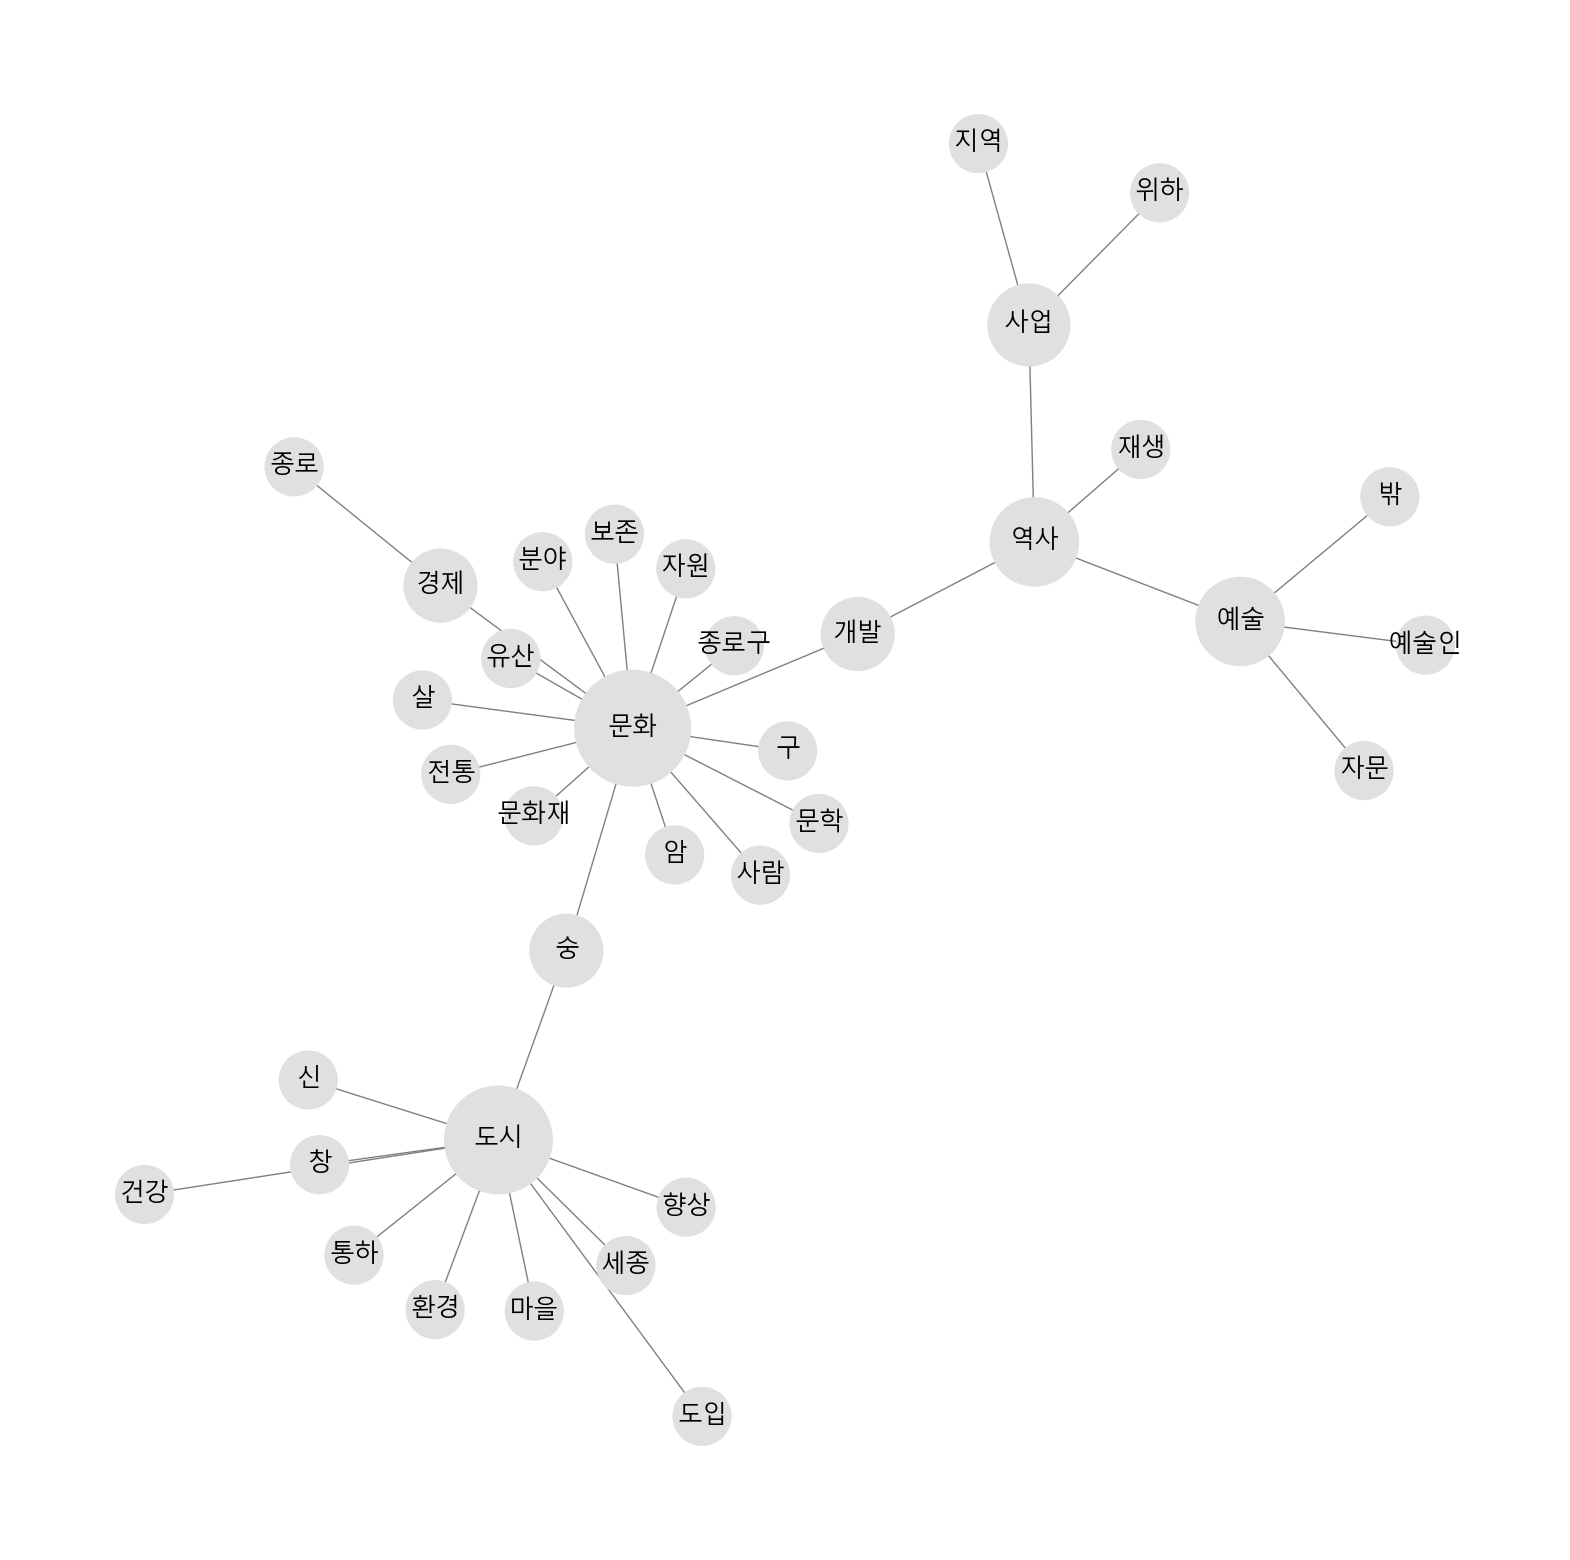

================== 헤럴드경제 ==================


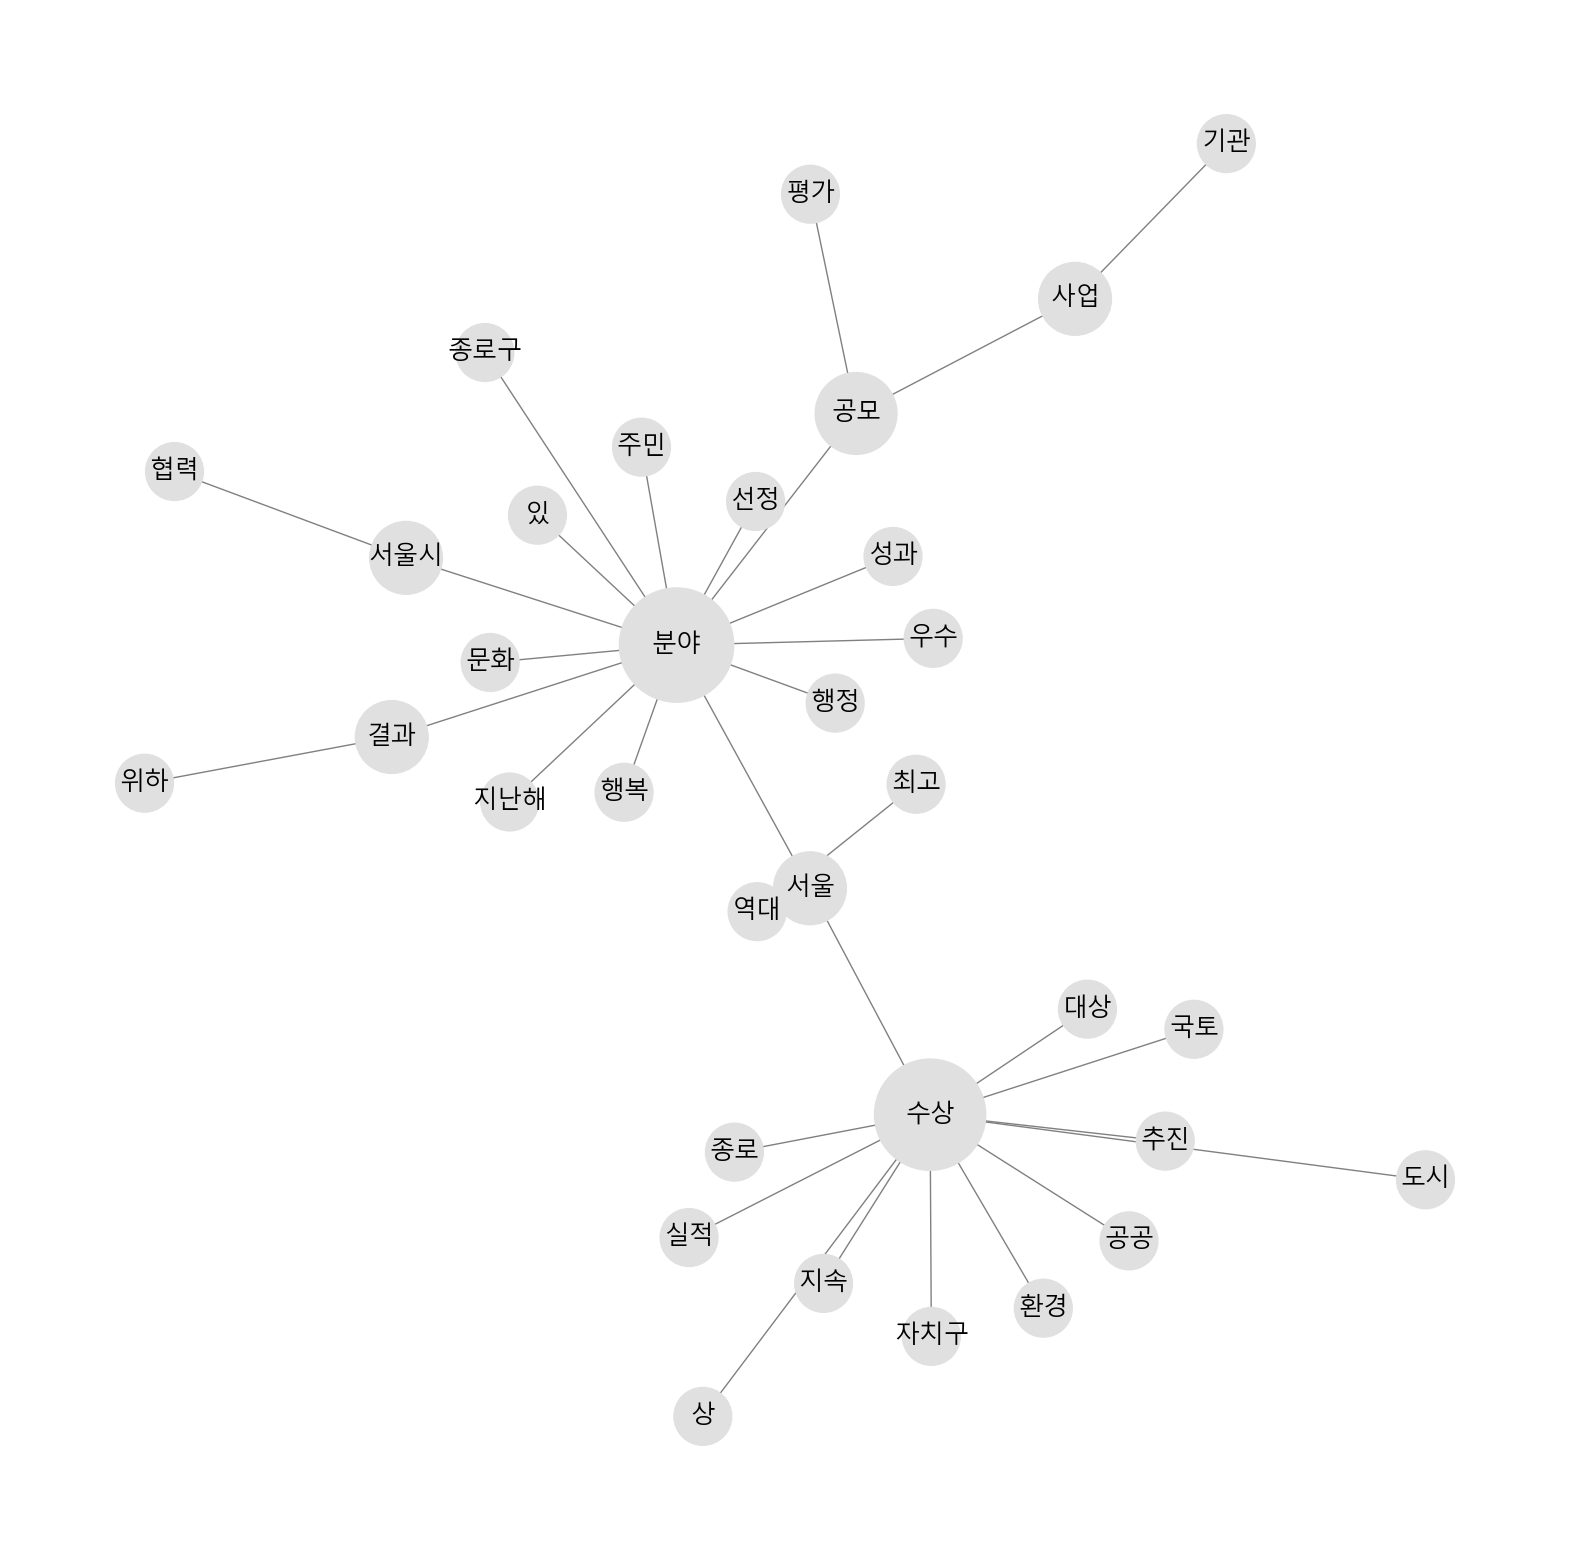

In [ ]:
spanning_networks = {}
for publishers in PUBLISHERS:
    print("================== {} ==================".format(publishers))
    S = nx.minimum_spanning_tree(general_networks[publishers]) # 기존 네트워크를 가져온다.
    sizes = [math.log(S.degree(n) + 1) * 2500 for n in S.nodes()]
    plt.figure(figsize = (20, 20))

    spanning_networks[publishers] = S

    nx.draw_networkx(S,
                    pos = nx.kamada_kawai_layout(S, scale=1),
                    node_size = sizes,
                     node_color = '#e0e0e0',
                     edge_color = 'grey',
                     font_family = "malgun gothic", #"NanumGothic", "malgun gothic" 또는 "AppleGothic"
                     #label_pos = 0.5, # [0 - 1], Head to Tail
                     with_labels = True,
                     font_size = 18
                    )

    plt.axis("off")
    plt.show()

In [ ]:
for publishers in PUBLISHERS:
    nodes = general_networks[publishers].nodes()

    degree_cents = nx.degree_centrality(general_networks[publishers])
    closeness_cents = nx.closeness_centrality(general_networks[publishers])
    betweenness_cents = nx.betweenness_centrality(general_networks[publishers])

    print(" ============ {} ============ ".format(publishers))
    print("\t\t{}\t{}\t{}".format("degree", "closeness", "betweenness"))

    for node in list(nodes)[:20]:
        print("{:<10}\t\t{:.4f}\t\t{:.4f}\t\t{:.4f}".format(node, degree_cents[node],
                                                      closeness_cents[node],
                                                      betweenness_cents[node]))
    print()

 ============ 매일경제 ============ 
		degree	closeness	betweenness
건강        		1.0000		1.0000		0.9739
도시        		0.1250		0.5333		0.0015
서울        		0.1607		0.5437		0.0054
엑스포       		0.0893		0.5234		0.0000
의료        		0.1250		0.5333		0.0036
시민        		0.0179		0.5045		0.0000
서울시       		0.0536		0.5138		0.0000
프로젝트      		0.0536		0.5138		0.0000
하이        		0.0893		0.5234		0.0000
국내        		0.0179		0.5045		0.0000
서비스       		0.0714		0.5185		0.0000
요인        		0.0714		0.5185		0.0000
이번        		0.0714		0.5185		0.0000
주         		0.0357		0.5091		0.0000
이벤트       		0.0536		0.5138		0.0000
개최        		0.0893		0.5234		0.0000
만들        		0.0179		0.5045		0.0000
무역        		0.0179		0.5045		0.0000
밝히        		0.0179		0.5045		0.0000
오         		0.0179		0.5045		0.0000

 ============ 내일신문 ============ 
		degree	closeness	betweenness
금연        		0.5227		0.6769		0.3152
아파트       		0.8182		0.8462		0.7146
흡연        		0.2955		0.5789		0.0568
지정        		0.0682		0.5116		0.0000
주민        		0.1364		0.5366		0.0